## Sentiment Analysis across Common TF-IDF Terms
Gulliver Wutz

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', 50)

In [13]:
reddit_posts = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_posts_sentiment_2.csv')
reddit_posts.columns

Index(['Subreddit', 'Title', 'ID', 'Full ID', 'Author', 'URL', 'Is Self-post',
       'Score', 'Comment Count', 'Created CEST', 'Collected CEST',
       'Updated CEST', 'Content', 'Patch', 'BERT-BASE Title Sentiment',
       'BERT-BASE Content Sentiment', 'RoBERTa Title Sentiment',
       'RoBERTa Content Sentiment'],
      dtype='object')

In [14]:
common_tf_idf = [' want', ' actually', ' guys', ' kill', ' hit', ' mid', ' game', ' got', ' really', ' played', ' ult', ' champion', 
                 ' xb', ' support', ' like', ' main', ' feel', ' use', ' make', ' going', ' love', ' hp', ' help', 
                 ' early', ' play', ' dont', ' item', ' know', ' enemy', ' maybe', ' feels', ' team', ' playing', ' adc', 
                 ' ive', ' speed', ' level', ' games', ' bad', ' jungle', ' way', ' fun', ' items', ' people', ' better', ' ad', 
                 ' getting', ' pretty', ' used', ' new', ' think', ' try', ' season', ' build', ' damage', ' lane', ' time', ' win', 
                 ' gold', ' need', ' lot', ' champ', ' hard', ' champs', ' ap', ' usually', ' good', ' best', ' right', ' passive']


common_tf_idf = [s.replace(" ", "") for s in common_tf_idf]
common_tf_idf = [' ' + word + ' ' for word in common_tf_idf]

In [15]:
post_contents_df = reddit_posts[(reddit_posts['Patch'] != 0) & (reddit_posts['Is Self-post'] == True)].copy()
post_contents_df.loc[:, 'Full Content'] = post_contents_df['Title'] + ' ' + post_contents_df['Content']
post_contents_df = post_contents_df.dropna()

In [16]:
def find_word_in_text(text, words):
    for word in words:
        if word in text:
            return word
    return "NO COMMON TERM"

post_contents_df['Common Term'] = post_contents_df['Full Content'].apply(lambda x: find_word_in_text(x, common_tf_idf))

In [17]:
terms_count = post_contents_df.groupby('Common Term').agg({'Score': 'mean',
                                                     'BERT-BASE Title Sentiment': 'mean',
                                                     'RoBERTa Title Sentiment': 'mean',
                                                     'BERT-BASE Content Sentiment': 'mean',
                                                     'RoBERTa Content Sentiment': 'mean',
                                                     'Comment Count': 'mean',
                                                     'ID': 'size'}).reset_index()
terms_count = terms_count.rename(columns={'ID': 'Number of Appearances'})
terms_count = terms_count[terms_count['Common Term'] != 'NO COMMON TERM']
terms_count

,Common Term,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Comment Count,Number of Appearances
0,actually,22.179295,1.984996,0.899475,1.741935,0.888222,20.649662,1333
1,ad,7.142857,2.250000,0.928571,1.678571,0.964286,9.678571,28
2,adc,9.214286,1.107143,0.678571,1.928571,0.821429,11.928571,28
3,ap,6.285714,1.571429,1.000000,1.285714,1.000000,6.571429,7
4,bad,13.640000,1.706667,0.933333,1.466667,0.586667,15.826667,75
...,...,...,...,...,...,...,...,...
64,used,10.617021,1.851064,0.872340,1.276596,0.851064,9.425532,47
65,usually,8.769231,1.538462,0.615385,1.692308,0.769231,10.769231,13
66,want,15.865190,2.242405,0.937658,1.942722,0.963924,16.874367,3160
67,way,12.254717,1.943396,1.047170,1.745283,0.886792,9.405660,106


In [18]:
columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 
                        'Comment Count', 'Number of Appearances']
columns_to_offset = ['Number of Appearances']

terms_count[columns_to_normalize] = terms_count[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
terms_count[columns_to_offset] = terms_count[columns_to_offset].apply(lambda x: x - x.min())
terms_count['Score Rank'] = terms_count['Score'] * terms_count['Number of Appearances']
terms_count['Comment Rank'] = terms_count['Comment Count'] * terms_count['Number of Appearances']
terms_count['Sentiment Rank'] = ((terms_count['BERT-BASE Title Sentiment'] + terms_count['RoBERTa Title Sentiment'] + terms_count['BERT-BASE Content Sentiment'] + terms_count['RoBERTa Content Sentiment']) / 4) * terms_count['Number of Appearances']
terms_count

,Common Term,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Comment Count,Number of Appearances,Score Rank,Comment Rank,Sentiment Rank
0,actually,0.735036,-0.221727,-0.540233,-0.103520,-0.137526,1.972175,1.972869,1.450129,3.890843,-0.494700
1,ad,-0.691511,0.689651,-0.246515,-0.318736,0.410171,-0.811281,0.031245,-0.021606,-0.025348,0.004176
2,adc,-0.494989,-3.240766,-2.770168,0.530392,-0.618472,-0.240437,0.031245,-0.015466,-0.007512,-0.047640
3,ap,-0.772831,-1.644034,0.474529,-1.653081,0.667331,-1.599588,0.000000,-0.000000,-0.000000,-0.000000
4,bad,-0.075110,-1.178935,-0.198445,-1.038474,-2.308875,0.748542,0.101173,-0.007599,0.075732,-0.119503
...,...,...,...,...,...,...,...,...,...,...,...
64,used,-0.361908,-0.682336,-0.814145,-1.684052,-0.405083,-0.875479,0.059513,-0.021538,-0.052103,-0.053348
65,usually,-0.537213,-1.757412,-3.408014,-0.272081,-0.994322,-0.534571,0.008927,-0.004796,-0.004772,-0.014354
66,want,0.136000,0.663531,-0.154787,0.578453,0.407567,1.014352,4.691143,0.637994,4.758470,1.753038
67,way,-0.206535,-0.364795,0.950690,-0.092150,-0.147819,-0.880520,0.147296,-0.030422,-0.129697,0.012738


##### Top and Bottom Terms by 'Score Rank'

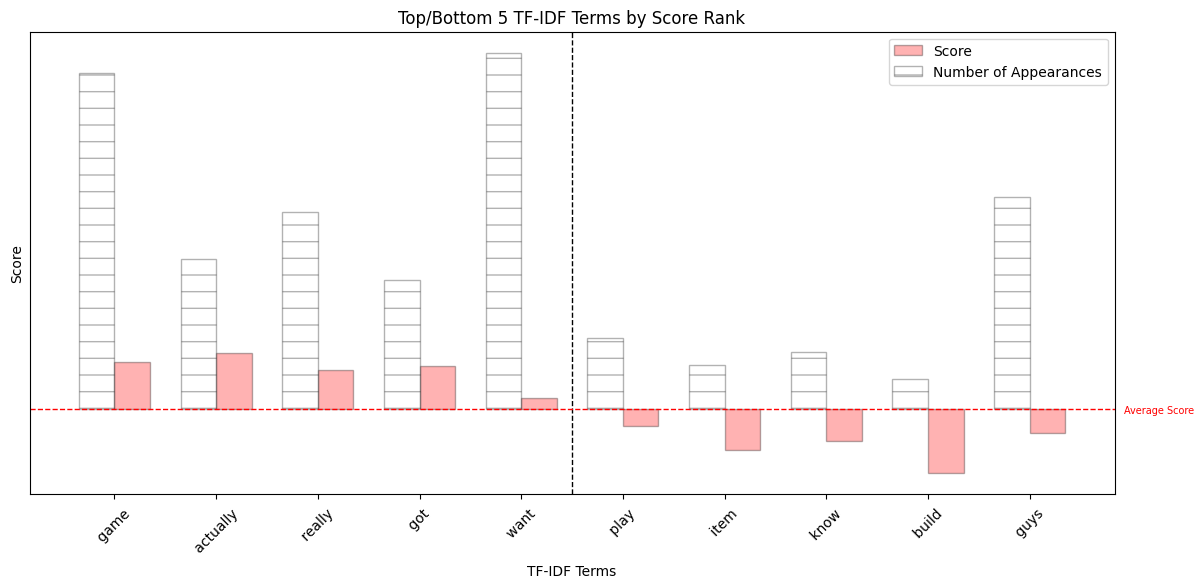

In [19]:
plot_df = terms_count
plot_df.sort_values(by='Score Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Common Term']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(14, 6))
plt.bar(r2, plot_df['Score'], color='red', alpha=0.3, width=bar_width, edgecolor='black', label='Score')
plt.bar(r1, plot_df['Number of Appearances'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Appearances')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Common Term']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Common Term']) + 0.1, -0.085, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('TF-IDF Terms')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Common Term']))], plot_df['Common Term'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 TF-IDF Terms by Score Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom Terms by 'Comment Rank'

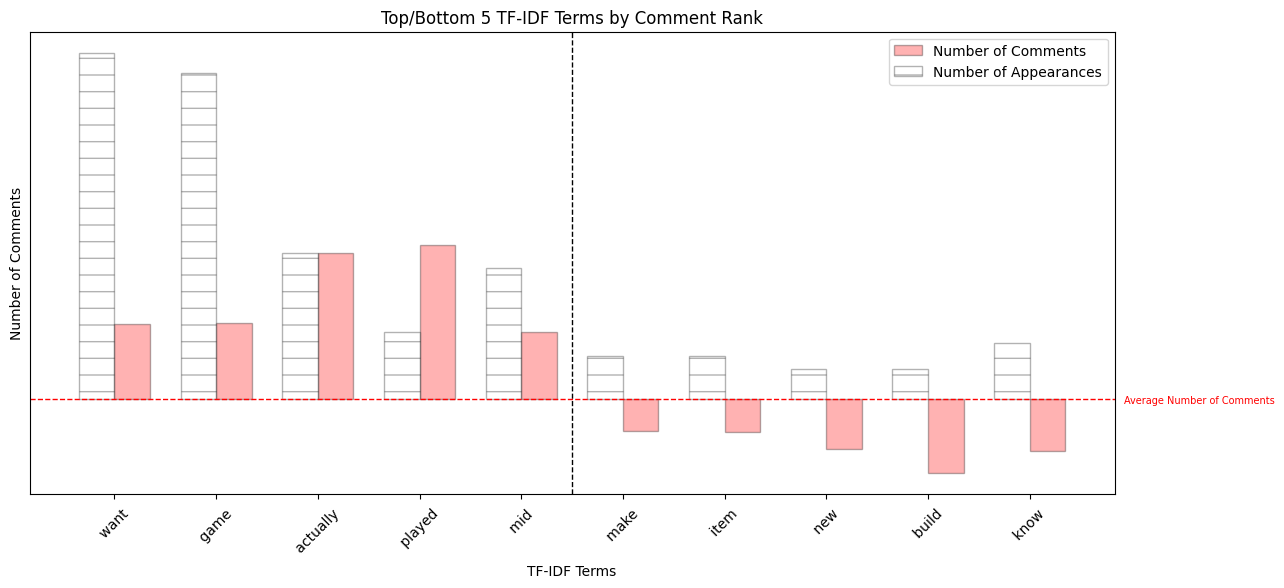

In [20]:
plot_df = terms_count
plot_df.sort_values(by='Comment Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Common Term']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(14, 6))
plt.bar(r2, plot_df['Comment Count'], color='red', alpha=0.3, width=bar_width, edgecolor='black', label='Number of Comments')
plt.bar(r1, plot_df['Number of Appearances'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Appearances')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Common Term']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Common Term']) + 0.1, -0.085, 'Average Number of Comments', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('TF-IDF Terms')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Common Term']))], plot_df['Common Term'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Number of Comments')
plt.title('Top/Bottom 5 TF-IDF Terms by Comment Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom Terms by 'Sentiment Rank'

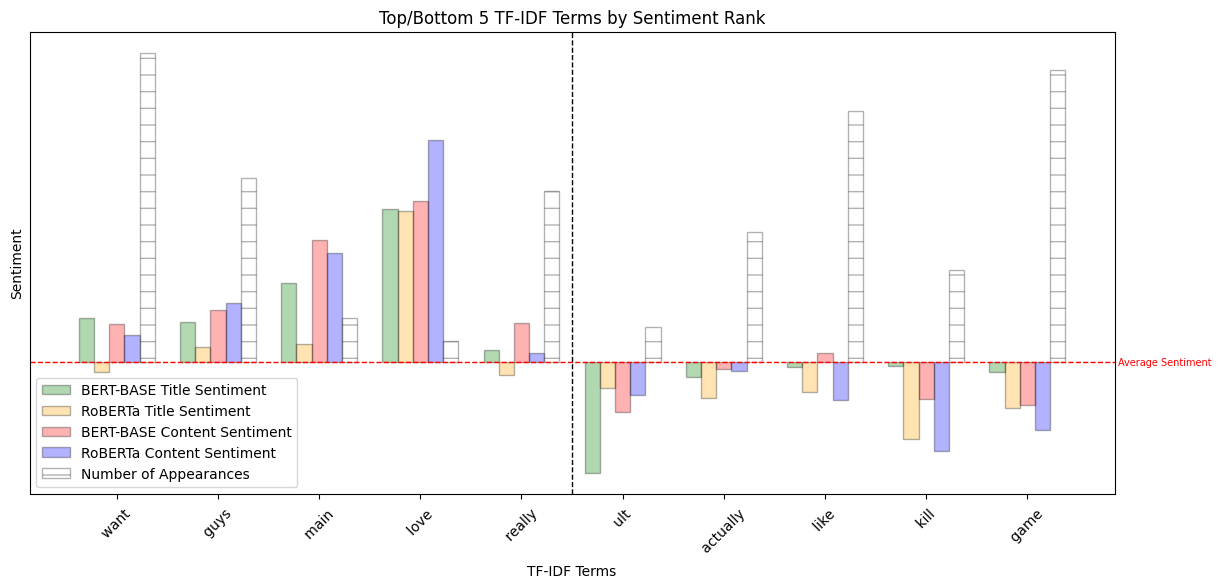

In [21]:
plot_df = terms_count
plot_df.sort_values(by='Sentiment Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)


# Plotting
bar_width = 0.15

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Common Term']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Make the plot
plt.figure(figsize=(14, 6))  # Adjusting the figure size to fit all bars
plt.bar(r1, plot_df['BERT-BASE Title Sentiment'], color='green', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Title Sentiment')
plt.bar(r2, plot_df['RoBERTa Title Sentiment'], color='orange', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Title Sentiment')
plt.bar(r3, plot_df['BERT-BASE Content Sentiment'], color='red', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Content Sentiment')
plt.bar(r4, plot_df['RoBERTa Content Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Content Sentiment')
plt.bar(r5, plot_df['Number of Appearances'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Appearances')

# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Common Term']) / 2 - 0.2
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Common Term']) + 0.2, -0.085, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('TF-IDF Terms')
plt.xticks([r + 2 * bar_width for r in range(len(plot_df['Common Term']))], plot_df['Common Term'])  # Adjusting xticks position
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 TF-IDF Terms by Sentiment Rank')


# Create legend & Show graphic
plt.legend()
plt.show()

##### Top 5 by 'Score Volatility Rank'

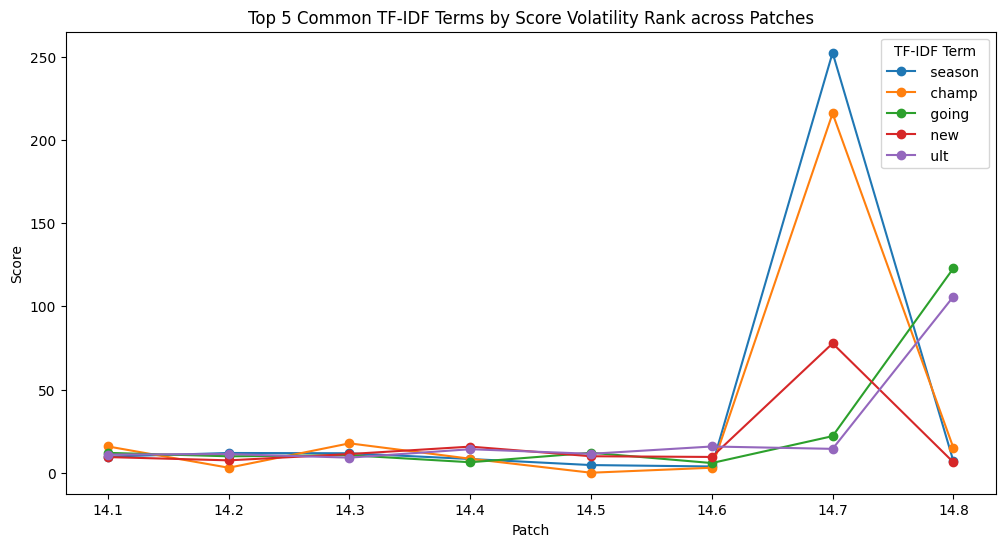

In [22]:
term_patch_values_df = post_contents_df.groupby(['Common Term', 'Patch']).agg(
    Score=('Score', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
term_patch_values_df['Avg_Score'] = term_patch_values_df['Score']
term_patch_values_df = term_patch_values_df[term_patch_values_df['Common Term'] != 'NO COMMON TERM']
term_patch_values_df = term_patch_values_df.rename(columns={'Common Term': 'Common_Term'})

term_patch_values_df['diffs'] = term_patch_values_df['Avg_Score'].diff()
mask = term_patch_values_df.Common_Term != term_patch_values_df.Common_Term.shift(1)
term_patch_values_df.loc[mask, 'diffs'] = np.nan
term_patch_values_df['diffs'] = term_patch_values_df['diffs'].fillna(0)
term_patch_values_df['diffs_squared'] = term_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
term_patch_values_df[columns_to_normalize] = term_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = term_patch_values_df.groupby(['Common_Term']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[:5]
volatility_df.reset_index(drop=True, inplace=True)
volatility_df

plot_df = term_patch_values_df[term_patch_values_df['Common_Term'].isin(volatility_df['Common_Term'])]
plot_df = plot_df.merge(volatility_df[['Common_Term', 'volatility_rank']], on='Common_Term', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for subreddit in plot_df['Common_Term'].unique():
    subset = plot_df[plot_df['Common_Term'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Score'], marker='o', label=subreddit)

plt.title('Top 5 Common TF-IDF Terms by Score Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Score')
# plt.yticks([])
plt.legend(title='TF-IDF Term')
plt.grid(False)
plt.show()

##### Bottom 5 by 'Score Volatility Rank'

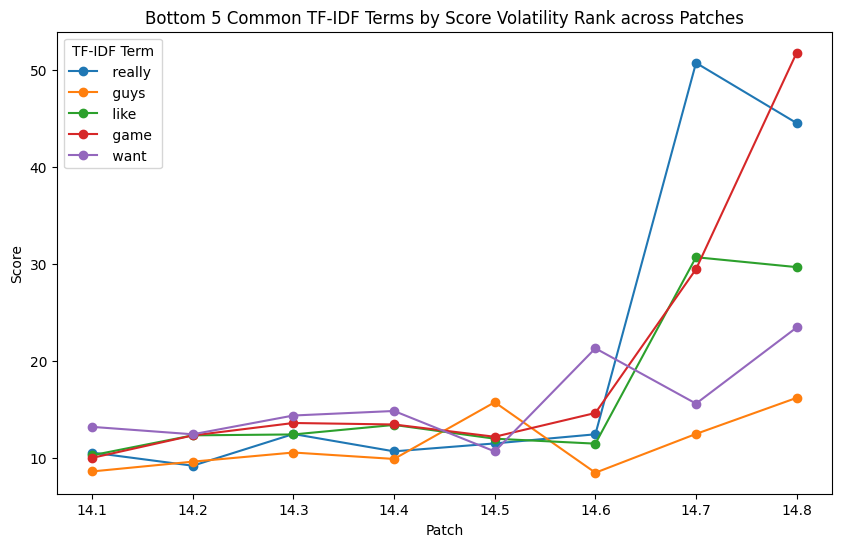

In [23]:
term_patch_values_df = post_contents_df.groupby(['Common Term', 'Patch']).agg(
    Score=('Score', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
term_patch_values_df['Avg_Score'] = term_patch_values_df['Score']
term_patch_values_df = term_patch_values_df[term_patch_values_df['Common Term'] != 'NO COMMON TERM']
term_patch_values_df = term_patch_values_df.rename(columns={'Common Term': 'Common_Term'})

term_patch_values_df['diffs'] = term_patch_values_df['Avg_Score'].diff()
mask = term_patch_values_df.Common_Term != term_patch_values_df.Common_Term.shift(1)
term_patch_values_df.loc[mask, 'diffs'] = np.nan
term_patch_values_df['diffs'] = term_patch_values_df['diffs'].fillna(0)
term_patch_values_df['diffs_squared'] = term_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
term_patch_values_df[columns_to_normalize] = term_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = term_patch_values_df.groupby(['Common_Term']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[-5:]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = term_patch_values_df[term_patch_values_df['Common_Term'].isin(volatility_df['Common_Term'])]
plot_df = plot_df.merge(volatility_df[['Common_Term', 'volatility_rank']], on='Common_Term', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)
plot_df

# Plotting
plt.figure(figsize=(10, 6))

for subreddit in plot_df['Common_Term'].unique():
    subset = plot_df[plot_df['Common_Term'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Score'], marker='o', label=subreddit)

plt.title('Bottom 5 Common TF-IDF Terms by Score Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Score')
# plt.yticks([])
plt.legend(title='TF-IDF Term')
plt.grid(False)
plt.show()

##### Top 5 by 'Sentiment Volatility Rank'

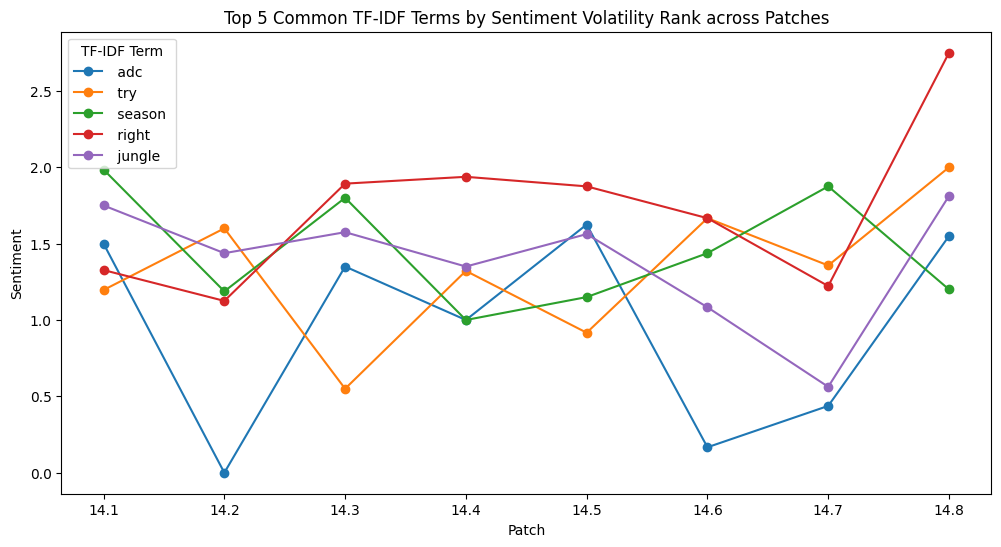

In [25]:
term_patch_values_df = post_contents_df.groupby(['Common Term', 'Patch']).agg(
    Score=('Score', 'mean'),
    BERT_BASE_Title_Sentiment=('BERT-BASE Title Sentiment', 'mean'),
    RoBERTa_Title_Sentiment=('RoBERTa Title Sentiment', 'mean'),
    BERT_BASE_Content_Sentiment=('BERT-BASE Content Sentiment', 'mean'),
    RoBERTa_Content_Sentiment=('RoBERTa Content Sentiment', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
term_patch_values_df['Avg_Sentiment'] = (term_patch_values_df['BERT_BASE_Title_Sentiment'] + term_patch_values_df['RoBERTa_Title_Sentiment'] + term_patch_values_df['BERT_BASE_Content_Sentiment'] + term_patch_values_df['RoBERTa_Content_Sentiment']) / 4
term_patch_values_df = term_patch_values_df[term_patch_values_df['Common Term'] != 'NO COMMON TERM']
term_patch_values_df = term_patch_values_df.rename(columns={'Common Term': 'Common_Term'})

term_patch_values_df['diffs'] = term_patch_values_df['Avg_Sentiment'].diff()
mask = term_patch_values_df.Common_Term != term_patch_values_df.Common_Term.shift(1)
term_patch_values_df.loc[mask, 'diffs'] = np.nan
term_patch_values_df['diffs'] = term_patch_values_df['diffs'].fillna(0)
term_patch_values_df['diffs_squared'] = term_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
term_patch_values_df[columns_to_normalize] = term_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = term_patch_values_df.groupby(['Common_Term']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[:5]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = term_patch_values_df[term_patch_values_df['Common_Term'].isin(volatility_df['Common_Term'])]
plot_df = plot_df.merge(volatility_df[['Common_Term', 'volatility_rank']], on='Common_Term', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for subreddit in plot_df['Common_Term'].unique():
    subset = plot_df[plot_df['Common_Term'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Sentiment'], marker='o', label=subreddit)

plt.title('Top 5 Common TF-IDF Terms by Sentiment Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Sentiment')
# plt.yticks([])
plt.legend(title='TF-IDF Term')
plt.grid(False)
plt.show()

##### Bottom 5 by 'Sentiment Volatility Rank'

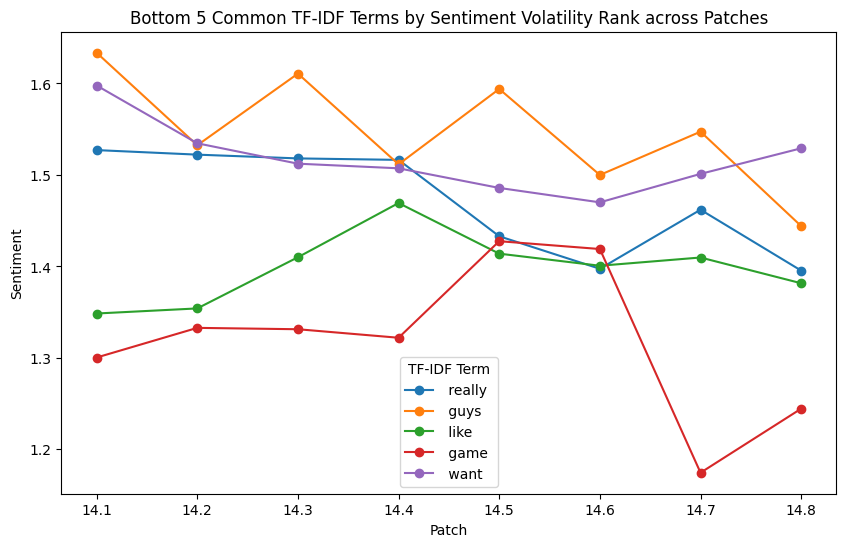

In [14]:
term_patch_values_df = post_contents_df.groupby(['Common Term', 'Patch']).agg(
    Score=('Score', 'mean'),
    BERT_BASE_Title_Sentiment=('BERT-BASE Title Sentiment', 'mean'),
    RoBERTa_Title_Sentiment=('RoBERTa Title Sentiment', 'mean'),
    BERT_BASE_Content_Sentiment=('BERT-BASE Content Sentiment', 'mean'),
    RoBERTa_Content_Sentiment=('RoBERTa Content Sentiment', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
term_patch_values_df['Avg_Sentiment'] = (term_patch_values_df['BERT_BASE_Title_Sentiment'] + term_patch_values_df['RoBERTa_Title_Sentiment'] + term_patch_values_df['BERT_BASE_Content_Sentiment'] + term_patch_values_df['RoBERTa_Content_Sentiment']) / 4
term_patch_values_df = term_patch_values_df[term_patch_values_df['Common Term'] != 'NO COMMON TERM']
term_patch_values_df = term_patch_values_df.rename(columns={'Common Term': 'Common_Term'})

term_patch_values_df['diffs'] = term_patch_values_df['Avg_Sentiment'].diff()
mask = term_patch_values_df.Common_Term != term_patch_values_df.Common_Term.shift(1)
term_patch_values_df.loc[mask, 'diffs'] = np.nan
term_patch_values_df['diffs'] = term_patch_values_df['diffs'].fillna(0)
term_patch_values_df['diffs_squared'] = term_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
term_patch_values_df[columns_to_normalize] = term_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = term_patch_values_df.groupby(['Common_Term']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[-5:]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = term_patch_values_df[term_patch_values_df['Common_Term'].isin(volatility_df['Common_Term'])]
plot_df = plot_df.merge(volatility_df[['Common_Term', 'volatility_rank']], on='Common_Term', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

for subreddit in plot_df['Common_Term'].unique():
    subset = plot_df[plot_df['Common_Term'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Sentiment'], marker='o', label=subreddit)

plt.title('Bottom 5 Common TF-IDF Terms by Sentiment Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Sentiment')
# plt.yticks([])
plt.legend(title='TF-IDF Term')
plt.grid(False)
plt.show()